In [67]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [68]:
def get_data():
    data = load_svmlight_file("data\\housing_scale")
    return data[0], data[1]

X, y = get_data()


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lenrat=0.02
n=100 
W=np.ones(X.shape[1])
b=1



In [70]:
def hy(W,b,X1,y1):
    loss=np.sum(np.square(X1*W + b - y1))/ (2*X1.shape[0])
    return loss

In [71]:
def main(W,b,lenrat,n,X_train,y_train,X_test,y_test):
    train = []
    validation = []
    for i in range(n):
        train.append(hy(W,b,X_train,y_train))
        validation.append(hy(W,b,X_test,y_test))
        DescentW = -(X_train*W + b - y_train)*X_train / X_train.shape[0]
        Descentb = -np.sum((X_train*W + b - y_train)) / X_train.shape[0]
        W = W + lenrat*DescentW
        b = b + lenrat*Descentb
    return train,validation

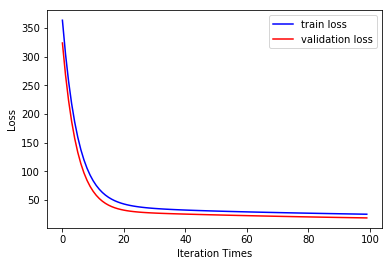

In [72]:
trainloss,validationloss = main(W,b,lenrat,n,X_train,y_train,X_test,y_test)

plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('Iteration Times')
plt.ylabel('Loss')
plt.plot(x,trainloss,color="b",label = "train loss")
plt.plot(x,validationloss,color="r",label = "validation loss")
plt.legend(loc='upper right')
plt.show()